In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
tweet_df1 = pd.read_excel("1.xlsx",index_col=0)
tweet_df2 = pd.read_excel("2.xlsx",index_col=0)

In [11]:
tweet_df1.drop_duplicates(inplace = True)
tweet_df2.drop_duplicates(inplace = True)

In [14]:
tweet_list1 = tweet_df1.values.tolist()
tweet_list2 = tweet_df2.values.tolist()

In [32]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

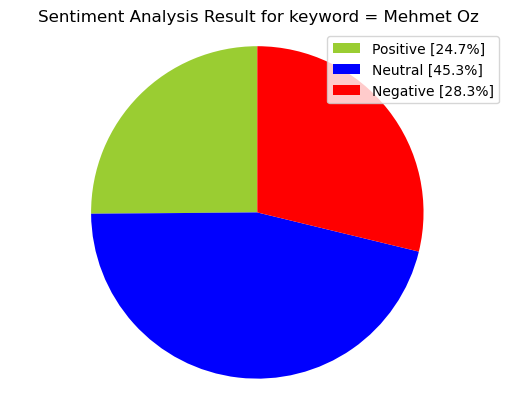

In [40]:
keyword = "Mehmet Oz"
noOfTweet = 1000

positive = 0
negative = 0
neutral = 0
polarity = 0
neutral_list1 = []
negative_list1 = []
positive_list1 = []

for tweet in tweet_list1:
 
 #print(tweet.text)
    analysis = TextBlob(tweet[0])
    score = SentimentIntensityAnalyzer().polarity_scores(tweet[0])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list1.append(tweet[0])
        negative += 1
    
    elif pos > neg:
        positive_list1.append(tweet[0])
        positive += 1
 
    elif pos == neg:
        neutral_list1.append(tweet[0])
        neutral += 1

positive = percentage(positive, 1000)
negative = percentage(negative, 1000)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = "+keyword+"" )
plt.axis('equal')
plt.show()

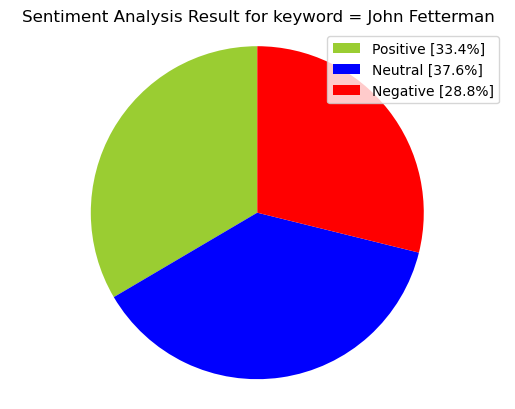

In [42]:
keyword = "John Fetterman"
noOfTweet = 1000

positive = 0
negative = 0
neutral = 0
polarity = 0
neutral_list2 = []
negative_list2 = []
positive_list2 = []

for tweet in tweet_list2:
 
 #print(tweet.text)
    analysis = TextBlob(tweet[0])
    score = SentimentIntensityAnalyzer().polarity_scores(tweet[0])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list2.append(tweet[0])
        negative += 1
    
    elif pos > neg:
        positive_list2.append(tweet[0])
        positive += 1
 
    elif pos == neg:
        neutral_list2.append(tweet[0])
        neutral += 1

positive = percentage(positive, 1000)
negative = percentage(negative, 1000)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = "+keyword+"" )
plt.axis('equal')
plt.show()

In [76]:
from wordcloud import WordCloud
def create_wordcloud(list,title):
    text = " ".join(np.array(list).flatten().tolist())
    text = text.replace("https","")
    text = text.replace("http","")
    text = text.replace("t.co","")
    text = text.replace("Mehmet","")
    text = text.replace("Oz","")
    text = text.replace("John","")
    text = text.replace("Fetterman","")
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    # Display the generated Word Cloud
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

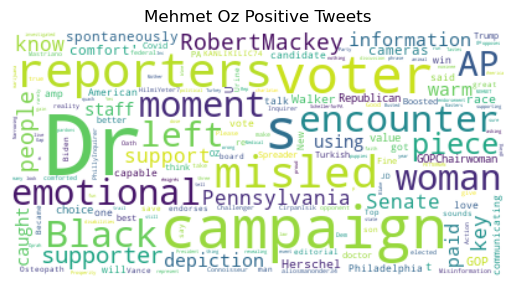

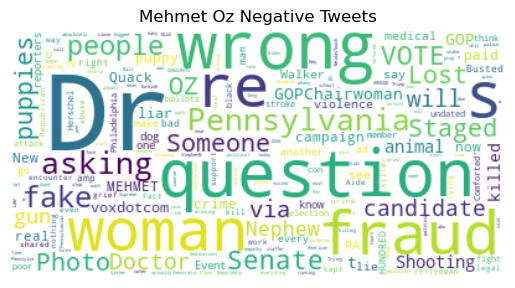

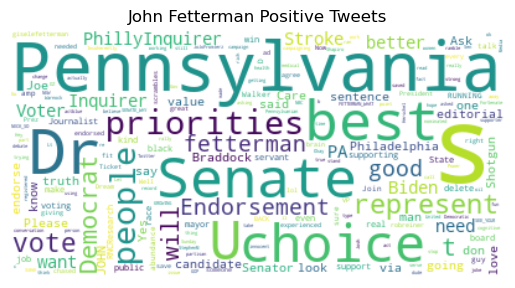

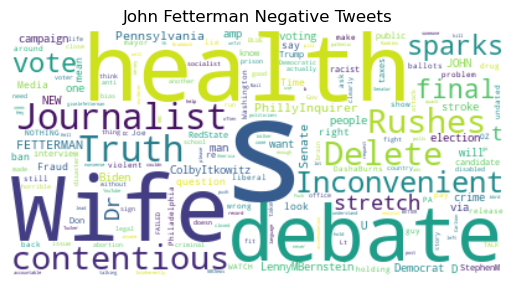

In [79]:
create_wordcloud(positive_list1, "Mehmet Oz Positive Tweets")
create_wordcloud(negative_list1, "Mehmet Oz Negative Tweets")
create_wordcloud(positive_list2, "John Fetterman Positive Tweets")
create_wordcloud(negative_list2, "John Fetterman Negative Tweets")